In [2]:
import pandas as pd

In [3]:
pd.options.display.max_columns = None # type: ignore

In [4]:
data = pd.read_csv("Cleaned_Dataset.csv")
data.head()

,CLIENTNUM,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,45,1,3,1,0,1,0,0,2,0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,49,0,5,3,0,0,1,0,0,0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,51,1,3,3,0,1,0,0,3,0,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,40,0,4,1,0,0,0,1,0,0,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,40,1,3,0,0,1,0,0,2,0,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


## With Vs Without Feature Scaling

The title basically says it all. I'm going to cluster the data, 1st **without** Feature Scaling, then **with** Feature Scaling. To see how much of a positive impact there is on the results.

In [5]:
import sklearn.cluster as cluster
import matplotlib.pyplot as plt

### Model Training (Without Scaling)

In [6]:
# Choosing relevant features

marital_statuses = ["Marital_Status_Divorced", "Marital_Status_Married", 
                    "Marital_Status_Single", "Marital_Status_Unknown"]

demographics_features = ["Customer_Age", "Gender", "Dependent_count", 
                         "Education_Level", "Income_Category"]
demographics_features += marital_statuses

# Credit Card Usage
ccu_features = ["Card_Category","Months_on_book","Total_Revolving_Bal",
                "Avg_Open_To_Buy","Total_Trans_Amt","Total_Trans_Ct",
                "Avg_Utilization_Ratio"]

selected_features = demographics_features + ccu_features

In [7]:
# Elbow Method

k_range = [n for n in range(1, 11)]
wcss_list = []
for k in k_range:
    kMeans = cluster.KMeans(k).fit(data[selected_features])
    wcss = kMeans.inertia_ # Within-Cluster Sum of Squares (WCSS)
    wcss_list.append(wcss)

In [8]:
wcss_list

[811656146581.2452,
 268152537951.92932,
 172665409077.4449,
 119790019691.99803,
 104774131497.08737,
 75344946393.30371,
 63647290781.90195,
 56811829481.66987,
 44458702505.69307,
 39215614900.99886]

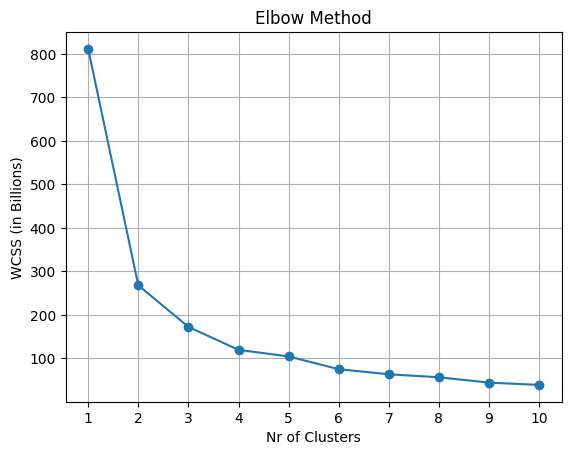

In [9]:
from matplotlib.ticker import FuncFormatter

def billions_formatter(val, tick):
  return f"{val / 1e9:.0f}"

fig, ax = plt.subplots()

ax.plot(k_range, wcss_list, marker="o")
ax.set_ylabel("WCSS (in Billions)")
ax.set_xlabel("Nr of Clusters")
ax.set_title("Elbow Method")
ax.set_xticks(k_range)
ax.grid()

ax.yaxis.set_major_formatter(FuncFormatter(billions_formatter))

plt.show()

Based on the graph, The optimal number of clusters is **2**.

In [10]:
import sklearn.metrics as metrics

In [57]:
# Silhouette Coefficient/Score

k_range = [n for n in range(2, 11)]
sil_scores = []
df_labelSets = pd.DataFrame()

for k in k_range:
    labels = cluster.KMeans(k,random_state=0).fit(data[selected_features]).labels_
    sil_score = metrics.silhouette_score(data[selected_features], labels, random_state=0) 
    print ("Silhouette score for {} clusters is {}".format(k,sil_score))

    sil_scores.append(sil_score)
    df_labelSets.insert(len(df_labelSets.columns), str(k), labels) # Used for "Cluster" column creation

    

Silhouette score for 2 clusters is 0.6775367543325725
Silhouette score for 3 clusters is 0.5626411522865528
Silhouette score for 4 clusters is 0.6045495351783402
Silhouette score for 5 clusters is 0.5240880598627613
Silhouette score for 6 clusters is 0.46030579660133353
Silhouette score for 7 clusters is 0.4662117362866638
Silhouette score for 8 clusters is 0.47724622171929876
Silhouette score for 9 clusters is 0.471325740132178
Silhouette score for 10 clusters is 0.4173749269682986


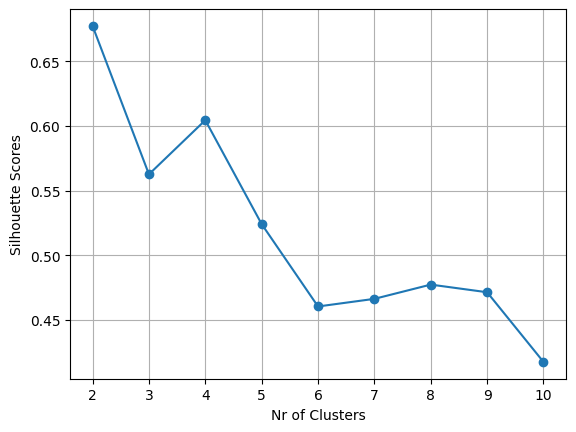

In [58]:
fig, ax = plt.subplots()

ax.plot(k_range, sil_scores, marker="o")
ax.set_ylabel("Silhouette Scores")
ax.set_xlabel("Nr of Clusters")
ax.grid()

plt.show()

In [61]:
data.insert(len(data.columns), "Clusters", df_labelSets["2"])

In [64]:
data[selected_features].head()

,Customer_Age,Gender,Dependent_count,Education_Level,Income_Category,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,Card_Category,Months_on_book,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
0,45,1,3,1,2,0,1,0,0,0,39,777,11914.0,1144,42,0.061
1,49,0,5,3,0,0,0,1,0,0,44,864,7392.0,1291,33,0.105
2,51,1,3,3,3,0,1,0,0,0,36,0,3418.0,1887,20,0.000
3,40,0,4,1,0,0,0,0,1,0,34,2517,796.0,1171,20,0.760
4,40,1,3,0,2,0,1,0,0,0,21,0,4716.0,816,28,0.000


In [14]:
data[["Customer_Age", "Total_Trans_Ct"]].agg(["min", "max"])

,Customer_Age,Total_Trans_Ct
min,26,11
max,73,139


In [15]:
data[["Dependent_count", "Total_Revolving_Bal"]].agg(["min", "max"])

,Dependent_count,Total_Revolving_Bal
min,0,0
max,5,2517


In [16]:
data[["Card_Category", "Avg_Utilization_Ratio"]].agg(["min", "max"])

,Card_Category,Avg_Utilization_Ratio
min,0,0.000
max,3,0.994


In [26]:
import random

def jitter(data, amount=0.1):
  jittered_data = []
  for value in data:
    jittered_value = value + random.uniform(-amount, amount)
    jittered_data.append(jittered_value)
  return jittered_data

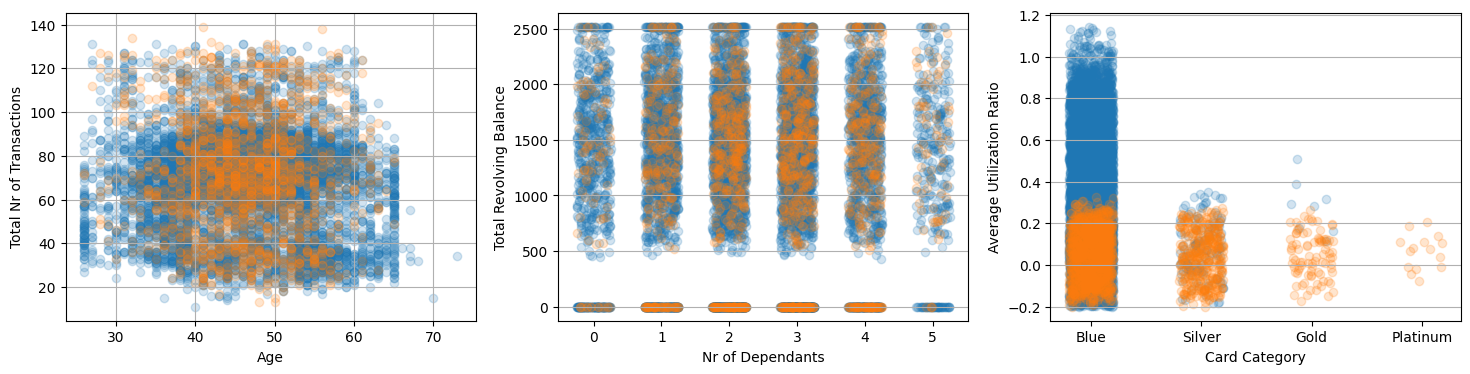

In [215]:
fig, ax = plt.subplots(1, 3, figsize=(18, 4))

ALPHA = 0.2

def func(df: pd.DataFrame, cluster_k: str):
    ax[0].scatter(df.query("Clusters == "+cluster_k)["Customer_Age"], 
                  df.query("Clusters == "+cluster_k)["Total_Trans_Ct"], alpha=ALPHA)

func(data, "0")
func(data, "1")
ax[0].set_xlabel("Age")
ax[0].set_ylabel("Total Nr of Transactions")
ax[0].grid()

def func1(df: pd.DataFrame, cluster_k: str, x: str, y: str, jitterAmt = 0.25):
    return (jitter(df.query("Clusters == "+cluster_k)[x], amount=jitterAmt),
            jitter(df.query("Clusters == "+cluster_k)[y], amount=jitterAmt))

jittered_x_1, jittered_y_1 = func1(data, "0", "Dependent_count", "Total_Revolving_Bal")
jittered_x_2, jittered_y_2 = func1(data, "1", "Dependent_count", "Total_Revolving_Bal")

def func2(subplotNum):
    ax[subplotNum].scatter(jittered_x_1, jittered_y_1, alpha=ALPHA)
    ax[subplotNum].scatter(jittered_x_2, jittered_y_2, alpha=ALPHA)

func2(1)
ax[1].set_xlabel("Nr of Dependants")
ax[1].set_ylabel("Total Revolving Balance")
ax[1].grid(axis="y")

jittered_x_1, jittered_y_1 = func1(data, "0", "Card_Category", "Avg_Utilization_Ratio", 0.2)
jittered_x_2, jittered_y_2 = func1(data, "1", "Card_Category", "Avg_Utilization_Ratio", 0.2)

func2(2)
ax[2].set_xlabel("Card Category")
ax[2].set_ylabel("Average Utilization Ratio")
ax[2].set_xticks([0, 1, 2, 3], ["Blue", "Silver", "Gold", "Platinum"])
ax[2].grid(axis="y")

plt.show()

### Model Training (With Scaling)

In [85]:
modes = data["Customer_Age"].mode()

print("Mean: " + str(data["Customer_Age"].mean()))
print("Median: " + str(data["Customer_Age"].median()))
print("Mode(s): " + ", ".join(str(mode) for mode in modes))

Mean: 46.26211764705882
Median: 46.0
Mode(s): 44, 49


Checking Distributions for other (selected) features that have a large range of data (more than 9 unique values).


In [111]:
selected_features_1 = [] # to plot to find out more about the distribution of the data

for x in selected_features:
    num_uniques = len(data[x].unique()) 
    if num_uniques > 9:
        print(x,":\t\t",num_uniques," unique values", sep='')
        selected_features_1.append(x)

Customer_Age:		45 unique values
Months_on_book:		44 unique values
Total_Revolving_Bal:		1841 unique values
Avg_Open_To_Buy:		5968 unique values
Total_Trans_Amt:		4415 unique values
Total_Trans_Ct:		124 unique values
Avg_Utilization_Ratio:		932 unique values


In [112]:
# Since I already plotted the distribution of "Customer_Age" in the other 
# notebook, I can skip that one.
selected_features_1.remove("Customer_Age")

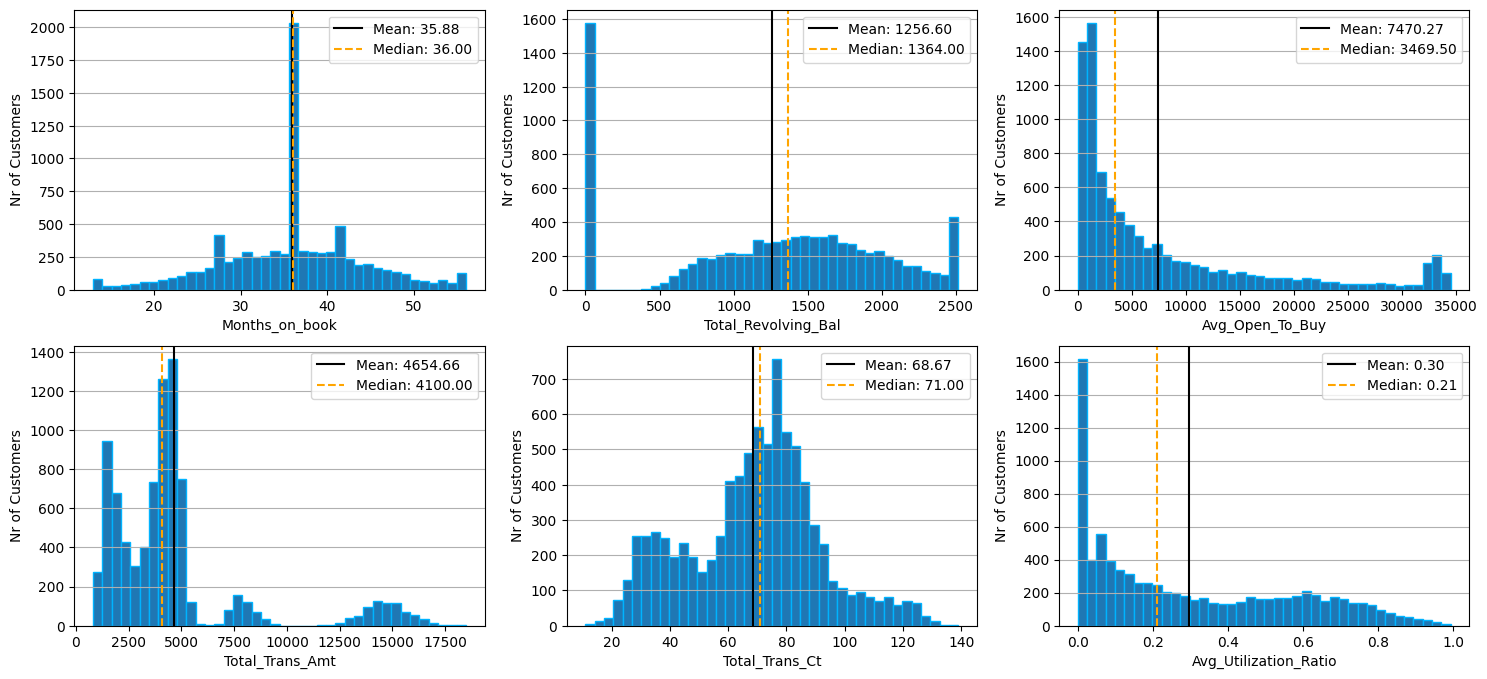

In [135]:
fig, ax = plt.subplots(2, 3, figsize=(18, 8))
ax_flat = ax.flatten()

for i in range(len(ax_flat)):
    ax_flat[i].hist(data[selected_features_1[i]], bins=40, edgecolor = (0, 0.7, 1))
    ax_flat[i].set_xlabel(selected_features_1[i])
    ax_flat[i].set_ylabel("Nr of Customers")

    plt_mean = data[selected_features_1[i]].mean()
    plt_median = data[selected_features_1[i]].median()
    ax_flat[i].axvline(plt_mean, color="black", label="Mean: {:.2f}".format(plt_mean))
    ax_flat[i].axvline(plt_median, color="orange", label="Median: {:.2f}".format(plt_median), 
                       linestyle="dashed")
    
    ax_flat[i].grid(axis="y")
    ax_flat[i].legend()

plt.show()

In [147]:
data[selected_features].agg(["min", "max"])

,Customer_Age,Gender,Dependent_count,Education_Level,Income_Category,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,Card_Category,Months_on_book,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
min,26,0,0,0,0,0,0,0,0,0,13,0,15.0,816,11,0.000
max,73,1,5,6,5,1,1,1,1,3,56,2517,34516.0,18484,139,0.994


In [175]:
from sklearn.preprocessing import MinMaxScaler

In [204]:
scaling = MinMaxScaler()
scaled_data = scaling.fit_transform(data[selected_features])

In [205]:
scaled_data

array([[0.40425532, 1.        , 0.6       , ..., 0.01856464, 0.2421875 ,
        0.06136821],
       [0.4893617 , 0.        , 1.        , ..., 0.02688476, 0.171875  ,
        0.1056338 ],
       [0.53191489, 1.        , 0.6       , ..., 0.06061807, 0.0703125 ,
        0.        ],
       ...,
       [0.59574468, 1.        , 0.2       , ..., 0.83546525, 0.8046875 ,
        0.15191147],
       [0.63829787, 0.        , 0.2       , ..., 0.77994114, 0.8515625 ,
        0.16498994],
       [0.5106383 , 1.        , 0.4       , ..., 0.8297487 , 0.828125  ,
        0.46478873]])

In [206]:
scaled_data = pd.DataFrame(scaled_data, columns=selected_features)

In [207]:
scaled_data.head()

,Customer_Age,Gender,Dependent_count,Education_Level,Income_Category,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,Card_Category,Months_on_book,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
0,0.404255,1.0,0.6,0.166667,0.4,0.0,1.0,0.0,0.0,0.0,0.604651,0.308701,0.344889,0.018565,0.242188,0.061368
1,0.489362,0.0,1.0,0.500000,0.0,0.0,0.0,1.0,0.0,0.0,0.720930,0.343266,0.213820,0.026885,0.171875,0.105634
2,0.531915,1.0,0.6,0.500000,0.6,0.0,1.0,0.0,0.0,0.0,0.534884,0.000000,0.098635,0.060618,0.070312,0.000000
3,0.297872,0.0,0.8,0.166667,0.0,0.0,0.0,0.0,1.0,0.0,0.488372,1.000000,0.022637,0.020093,0.070312,0.764588
4,0.297872,1.0,0.6,0.000000,0.4,0.0,1.0,0.0,0.0,0.0,0.186047,0.000000,0.136257,0.000000,0.132812,0.000000


In [193]:
# Elbow Method

k_range = [n for n in range(1, 11)]
wcss_list = []
for k in k_range:
    kMeans = cluster.KMeans(k).fit(scaled_data[selected_features])
    wcss = kMeans.inertia_ # Within-Cluster Sum of Squares (WCSS)
    wcss_list.append(wcss)

In [194]:
wcss_list

[13094.908523485343,
 10698.93781226405,
 8415.67485392947,
 7295.879878846741,
 7100.2339321225645,
 6107.221351451133,
 5994.963860762812,
 5357.0682315802915,
 5015.3502293312795,
 4860.89510433852]

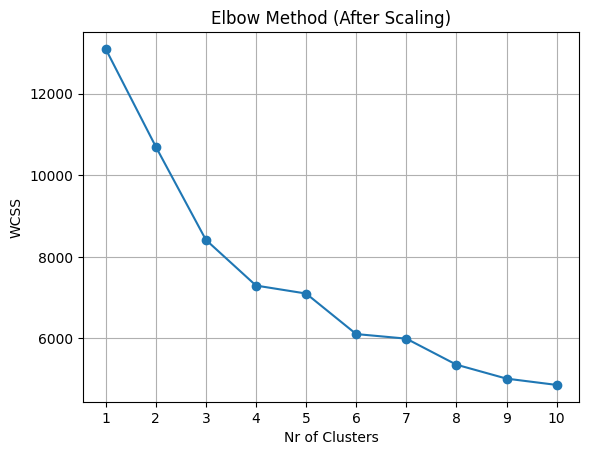

In [195]:
fig, ax = plt.subplots()

ax.plot(k_range, wcss_list, marker="o")
ax.set_ylabel("WCSS")
ax.set_xlabel("Nr of Clusters")
ax.set_title("Elbow Method (After Scaling)")
ax.set_xticks(k_range)
ax.grid()

In [196]:
k_range = [n for n in range(2, 11)]
sil_scores = []
df_labelSets = pd.DataFrame()

for k in k_range:
    labels = cluster.KMeans(k,random_state=0).fit(scaled_data[selected_features]).labels_
    sil_score = metrics.silhouette_score(scaled_data[selected_features], labels, random_state=0) 
    # print ("Silhouette score for {} clusters is {}".format(k,sil_score))

    sil_scores.append(sil_score)
    df_labelSets.insert(len(df_labelSets.columns), str(k), labels) # Used for "Cluster" column creation

print("Success")

Success


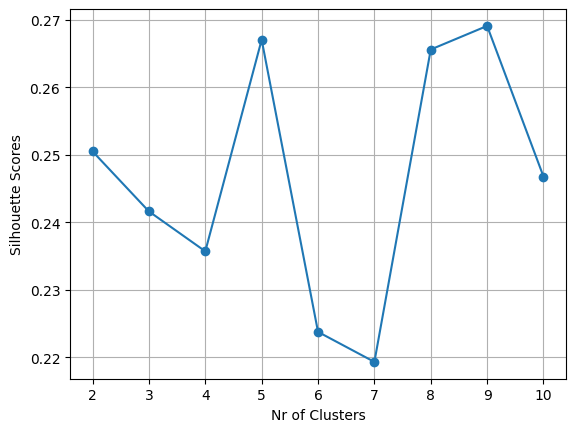

In [197]:
fig, ax = plt.subplots()

ax.plot(k_range, sil_scores, marker="o")
ax.set_ylabel("Silhouette Scores")
ax.set_xlabel("Nr of Clusters")
ax.grid()

plt.show()

In [200]:
print("5 Clusters: " + str(sil_scores[3])) 
print("9 Clusters: " + str(sil_scores[7]))

5 Clusters: 0.26702573641982685
9 Clusters: 0.2690707247348101


Therefore, the new optimal number of clusters is **9**.

In [212]:
scaled_data.insert(len(scaled_data.columns), "Clusters", df_labelSets["9"])
scaled_data.head()

,Customer_Age,Gender,Dependent_count,Education_Level,Income_Category,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,Card_Category,Months_on_book,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio,Clusters
0,0.404255,1.0,0.6,0.166667,0.4,0.0,1.0,0.0,0.0,0.0,0.604651,0.308701,0.344889,0.018565,0.242188,0.061368,4
1,0.489362,0.0,1.0,0.500000,0.0,0.0,0.0,1.0,0.0,0.0,0.720930,0.343266,0.213820,0.026885,0.171875,0.105634,0
2,0.531915,1.0,0.6,0.500000,0.6,0.0,1.0,0.0,0.0,0.0,0.534884,0.000000,0.098635,0.060618,0.070312,0.000000,4
3,0.297872,0.0,0.8,0.166667,0.0,0.0,0.0,0.0,1.0,0.0,0.488372,1.000000,0.022637,0.020093,0.070312,0.764588,3
4,0.297872,1.0,0.6,0.000000,0.4,0.0,1.0,0.0,0.0,0.0,0.186047,0.000000,0.136257,0.000000,0.132812,0.000000,4


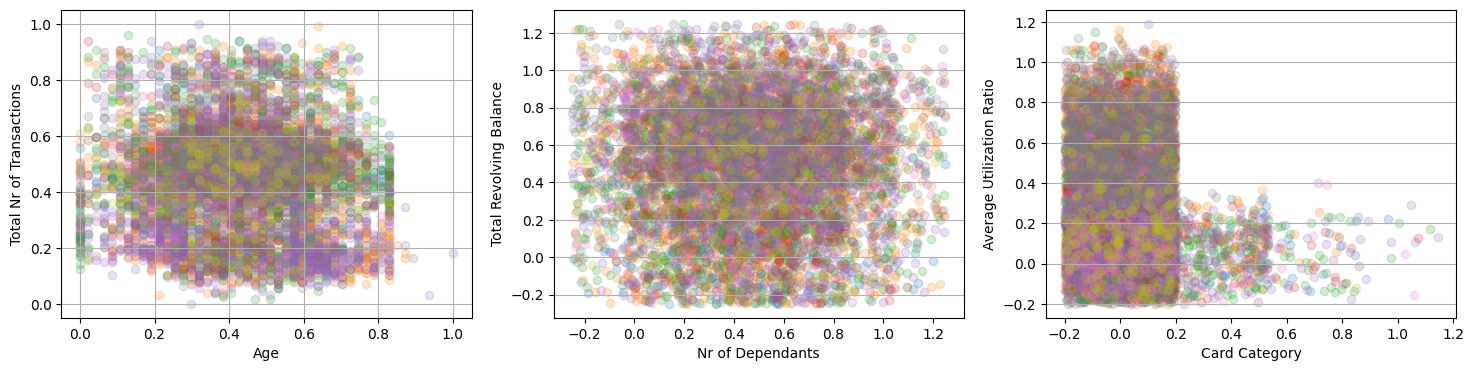

In [224]:
fig, ax = plt.subplots(1, 3, figsize=(18, 4))

ALPHA = 0.2

func(scaled_data, "0")
func(scaled_data, "1")
func(scaled_data, "2")
func(scaled_data, "3")
func(scaled_data, "4")
func(scaled_data, "5")
func(scaled_data, "6")
func(scaled_data, "7")
func(scaled_data, "8")
ax[0].set_xlabel("Age")
ax[0].set_ylabel("Total Nr of Transactions")
ax[0].grid()

jittered_x_1, jittered_y_1 = func1(scaled_data, "0", "Dependent_count", "Total_Revolving_Bal")
jittered_x_2, jittered_y_2 = func1(scaled_data, "1", "Dependent_count", "Total_Revolving_Bal")
jittered_x_3, jittered_y_3 = func1(scaled_data, "2", "Dependent_count", "Total_Revolving_Bal")
jittered_x_4, jittered_y_4 = func1(scaled_data, "3", "Dependent_count", "Total_Revolving_Bal")
jittered_x_5, jittered_y_5 = func1(scaled_data, "4", "Dependent_count", "Total_Revolving_Bal")
jittered_x_6, jittered_y_6 = func1(scaled_data, "5", "Dependent_count", "Total_Revolving_Bal")
jittered_x_7, jittered_y_7 = func1(scaled_data, "6", "Dependent_count", "Total_Revolving_Bal")
jittered_x_8, jittered_y_8 = func1(scaled_data, "7", "Dependent_count", "Total_Revolving_Bal")
jittered_x_9, jittered_y_9 = func1(scaled_data, "8", "Dependent_count", "Total_Revolving_Bal")

def func4(subplotNum):
    ax[subplotNum].scatter(jittered_x_1, jittered_y_1, alpha=ALPHA)
    ax[subplotNum].scatter(jittered_x_2, jittered_y_2, alpha=ALPHA)
    ax[subplotNum].scatter(jittered_x_3, jittered_y_3, alpha=ALPHA)
    ax[subplotNum].scatter(jittered_x_4, jittered_y_4, alpha=ALPHA)
    ax[subplotNum].scatter(jittered_x_5, jittered_y_5, alpha=ALPHA)
    ax[subplotNum].scatter(jittered_x_6, jittered_y_6, alpha=ALPHA)
    ax[subplotNum].scatter(jittered_x_7, jittered_y_7, alpha=ALPHA)
    ax[subplotNum].scatter(jittered_x_8, jittered_y_8, alpha=ALPHA)
    ax[subplotNum].scatter(jittered_x_9, jittered_y_9, alpha=ALPHA)
    ax[subplotNum].scatter(jittered_x_10, jittered_y_10, alpha=ALPHA)

func4(1)
ax[1].set_xlabel("Nr of Dependants")
ax[1].set_ylabel("Total Revolving Balance")
ax[1].grid(axis="y")

jittered_x_1, jittered_y_1 = func1(scaled_data, "0", "Card_Category", "Avg_Utilization_Ratio", 0.2)
jittered_x_2, jittered_y_2 = func1(scaled_data, "1", "Card_Category", "Avg_Utilization_Ratio", 0.2)
jittered_x_3, jittered_y_3 = func1(scaled_data, "2", "Card_Category", "Avg_Utilization_Ratio", 0.2)
jittered_x_4, jittered_y_4 = func1(scaled_data, "3", "Card_Category", "Avg_Utilization_Ratio", 0.2)
jittered_x_5, jittered_y_5 = func1(scaled_data, "4", "Card_Category", "Avg_Utilization_Ratio", 0.2)
jittered_x_6, jittered_y_6 = func1(scaled_data, "5", "Card_Category", "Avg_Utilization_Ratio", 0.2)
jittered_x_7, jittered_y_7 = func1(scaled_data, "6", "Card_Category", "Avg_Utilization_Ratio", 0.2)
jittered_x_8, jittered_y_8 = func1(scaled_data, "7", "Card_Category", "Avg_Utilization_Ratio", 0.2)
jittered_x_9, jittered_y_9 = func1(scaled_data, "8", "Card_Category", "Avg_Utilization_Ratio", 0.2)
jittered_x_10, jittered_y_10 = func1(scaled_data, "9", "Card_Category", "Avg_Utilization_Ratio", 0.2)

func4(2)
ax[2].set_xlabel("Card Category")
ax[2].set_ylabel("Average Utilization Ratio")
# ax[2].set_xticks([0, 1, 2, 3], ["Blue", "Silver", "Gold", "Platinum"])
# ax[2].set_xticks(labels=["Blue", "Silver", "Gold", "Platinum"])
ax[2].grid(axis="y")

plt.show()


In [222]:
len(selected_features)

16